In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import numpy as np
from models import Yolov4

/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [5]:
model = Yolov4(
#                 weight_path=None,
              weight_path='yolov4.weights',
#                img_size=(416, 416, 3),
              )

In [6]:
# model.build_model()

In [7]:
model.load_model('test.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
# model.save_model('test.h5')

[autoreload of tensorflow.python.keras.layers.core failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 434, in superreload
    module = reload(module)
  File "/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/__init__.py", line 148, in reload
    raise ImportError(msg.format(name), name=name)
ImportError: module models not in sys.modules
]


img shape:  (878, 2048, 3)
# of bboxes: 23


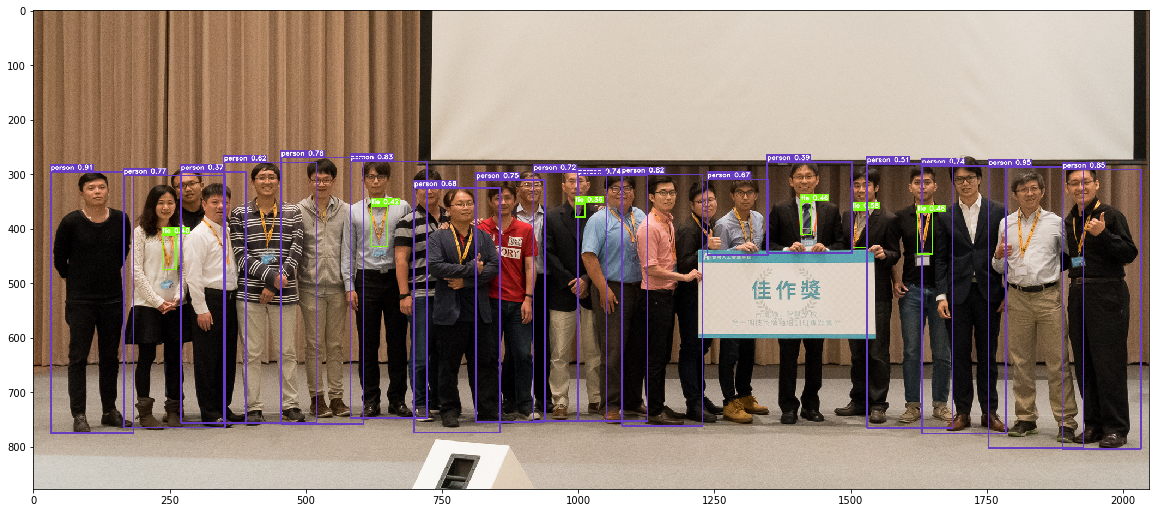

,x1,y1,x2,y2,class_name,score,w,h
0,1753,287,1927,802,person,0.946468,174,515
1,32,296,184,775,person,0.906453,152,479
2,1889,292,2033,804,person,0.853345,144,512
3,582,277,723,747,person,0.833982,141,470
4,1080,301,1228,762,person,0.822105,148,461
5,455,270,606,758,person,0.779945,151,488
6,166,303,352,765,person,0.770186,186,462
7,813,311,939,755,person,0.751453,126,444
8,1000,303,1127,753,person,0.744238,127,450
9,1631,285,1785,776,person,0.736264,154,491


In [9]:
model.predict('test.jpg', random_color=False)